This notebook serves as the rough outline of the actual pipeline that will be used for the data when it comes time to actually train some models

In [1]:
# From pipeline textbook chapter, adapted for full accident control data
import pandas as pd


In [2]:

from sklearn.preprocessing import LabelEncoder
X_train = pd.read_csv("../X_train_census.csv")
y_train = pd.read_csv("../y_train_census.csv")
X_test = pd.read_csv("../X_test_census.csv")
y_test = pd.read_csv("../y_test_census.csv")

df = pd.concat([X_train, y_train], axis = 1)

df.drop_duplicates(inplace=True)

X_train = df.iloc[:, :-1]
y_train = df.label

# Fix np formatting error
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

le = LabelEncoder()
y_train = le.fit_transform(y_train)

le.classes_
#print(y_train)
#print(X_train)


array([0, 1])

In [3]:
import numpy as np
import scipy
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(2)

pipe_svc = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
                         StandardScaler(with_mean = False),
                         LinearSVC())

param_grid = [{'linearsvc__C': param_range}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        cv=10,
                        random_state=1,
                        n_jobs=1)


rs = rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)
print("Best accuracy and model C: Base data, non-PCA")
print(rs.best_score_)
print(rs.best_params_)

c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
11 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\pipe

Best accuracy and model C: Base data, non-PCA
0.8397423019463833
{'linearsvc__C': np.float64(0.0010648568665651112)}


In [7]:
from sklearn.metrics import classification_report
y_true = y_test
target_names = ['class 0', 'class 1']
print("Classification Report: Base data, non-PCA")
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report: Base data, non-PCA
              precision    recall  f1-score   support

     class 0       0.95      0.95      0.95      7451
     class 1       0.95      0.95      0.95      7450

    accuracy                           0.95     14901
   macro avg       0.95      0.95      0.95     14901
weighted avg       0.95      0.95      0.95     14901



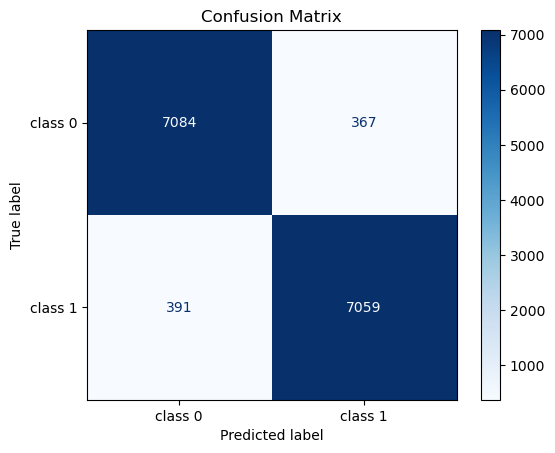

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [33]:
X_train = pd.read_csv("../X_train_census.csv")
y_train = pd.read_csv("../y_train_census.csv")
X_test = pd.read_csv("../X_test_census.csv")
y_test = pd.read_csv("../y_test_census.csv")

df = pd.concat([X_train, y_train], axis = 1)

df.drop_duplicates(inplace=True)

X_train = df.iloc[:, :-1]
y_train = df.label

X_train = X_train.drop(columns=['relationship', 'marital_status', 'hr_worked_per_week'])
X_test = X_test.drop(columns=['relationship', 'marital_status', 'hr_worked_per_week'])

# Fix np formatting error
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

le = LabelEncoder()
y_train = le.fit_transform(y_train)

le.classes_
#print(y_train)
#print(X_train)

array([0, 1])

In [34]:
param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(2)

pipe_svc = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
                         StandardScaler(with_mean = False),
                         LinearSVC())

param_grid = [{'linearsvc__C': param_range}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        cv=10,
                        random_state=1,
                        n_jobs=1)


rs = rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)
print("Best accuracy and model C: CFD Reduced data, non-PCA")
print(rs.best_score_)
print(rs.best_params_)

Best accuracy and model C: CFD Reduced data, non-PCA
0.790115906869729
{'linearsvc__C': np.float64(0.00010018452045446543)}


In [38]:
y_true = y_test
target_names = ['class 0 (Low Severity)', 'class 1 (High Severity)']
print("Classification Report: CFD Reduced data, non-PCA")
print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report: CFD Reduced data, non-PCA
                         precision    recall  f1-score   support

 class 0 (Low Severity)       0.92      0.92      0.92      7451
class 1 (High Severity)       0.92      0.92      0.92      7450

               accuracy                           0.92     14901
              macro avg       0.92      0.92      0.92     14901
           weighted avg       0.92      0.92      0.92     14901



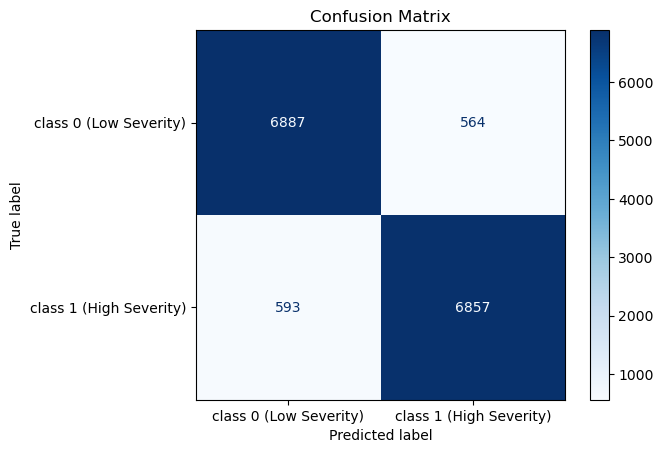

In [37]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [8]:

from sklearn.preprocessing import LabelEncoder
X_train = pd.read_csv("../Data_Cleaned/train_data/control_2class_X_train.csv")
y_train = pd.read_csv("../Data_Cleaned/train_data/control_2class_y_train.csv")
X_test = pd.read_csv("../Data_Cleaned/test_data/control_2class_X_test.csv")
y_test = pd.read_csv("../Data_Cleaned/test_data/control_2class_y_test.csv")

# Fix np formatting error
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

le = LabelEncoder()
y_train = le.fit_transform(y_train)

le.classes_
#print(y_train)
#print(X_train)

import numpy as np
import scipy
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(2)

pipe_svc = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
                         StandardScaler(with_mean = False),
                         PCA(random_state=1),
                         LinearSVC())

param_grid = [{'linearsvc__C': param_range}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        cv=10,
                        random_state=1,
                        n_jobs=1)


rs = rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)

print("Best accuracy and model C: Base Data, PCA")
print(rs.best_score_)
print(rs.best_params_)

from sklearn.metrics import classification_report
y_true = y_test
target_names = ['class 0 (Low Severity)', 'class 1 (High Severity)']
print("Classification Report: Base Data, PCA")
print(classification_report(y_true, y_pred, target_names=target_names))


X_train = pd.read_csv("../Data_Cleaned/train_data/control_2class_X_train.csv")
y_train = pd.read_csv("../Data_Cleaned/train_data/control_2class_y_train.csv")
X_test = pd.read_csv("../Data_Cleaned/test_data/control_2class_X_test.csv")
y_test = pd.read_csv("../Data_Cleaned/test_data/control_2class_y_test.csv")

X_train = X_train.drop(columns=['Visibility(mi)', 'Railway', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset'])
X_test = X_test.drop(columns=['Visibility(mi)', 'Railway', 'Stop', 'Traffic_Calming', 'Sunrise_Sunset'])

# Fix np formatting error
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

le = LabelEncoder()
y_train = le.fit_transform(y_train)

le.classes_
#print(y_train)
#print(X_train)

param_range = scipy.stats.loguniform(0.0001, 1000.0)

np.random.seed(1)
param_range.rvs(2)

pipe_svc = make_pipeline(OneHotEncoder(handle_unknown='ignore'),
                         StandardScaler(with_mean = False),
                         PCA(random_state=1),
                         LinearSVC())

param_grid = [{'linearsvc__C': param_range}]

rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_grid,
                        scoring='accuracy',
                        refit=True,
                        cv=10,
                        random_state=1,
                        n_jobs=1)


rs = rs.fit(X_train, y_train)
y_pred = rs.predict(X_test)
print("Best accuracy and model C: CFD Reduced Data, PCA")
print(rs.best_score_)
print(rs.best_params_)

y_true = y_test
target_names = ['class 0 (Low Severity)', 'class 1 (High Severity)']
print("Classification report: CFD Reduced Data, PCA")
print(classification_report(y_true, y_pred, target_names=target_names))

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ~~~~~~~~~~~~~~~~~~~~~~~~^
        cloned_transformer,
        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
        params=step_params,
        ^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\joblib\memory.py", line 312, in __call__
    return self.func(*args, **kwargs)
           ~~~~~~~~~^^^^^^^^^^^^^^^^^
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\decomposition\_pca.py", line 468, in fit_transform
    U, S, _, X, x_is_centered, xp = self._fit(X)
                                    ~~~~~~~~~^^^
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\decomposition\_pca.py", line 544, in _fit
    return self._fit_truncated(X, n_components, xp)
           ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bkb3\AppData\Local\miniconda3\Lib\site-packages\sklearn\decomposition\_pca.py", line 714, in _fit_truncated
    raise ValueError(
    ...<2 lines>...
    )
ValueError: n_components='mle' cannot be a string with svd_solver='arpack'
